In [5]:
pip install pandas-datareader

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Load libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Time series models
from statsmodels.tsa.arima_model import ARIMA
from keras.layers import LSTM



In [59]:

pip install tensorflow

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 497.5 MB 14 kB/s              ████████▌   | 443.5 MB 95.7 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 65 kB 446 kB/s             
     |████████████████████████████████| 462 kB 53.3 MB/s            
     |████████████████████████████████| 5.8 MB 50.1 MB/s            
     |████████████████████████████████| 4.3 MB 51.5 MB/s            
     |████████████████████████████████| 126 kB 78.5 MB/s            
     |████████████████████████████████| 14.5 MB 51.6 MB/s            
     |████████████████

In [7]:
stk_tickers =["MSFT","IBM","GOOGL"]
ccy_tickers = ["DEXJPUS","DEXUSUK"]
idx_tickers = ["SP500","DJIA","VIXCLS"]

In [8]:
stk_data = web.DataReader(stk_tickers,"yahoo")
ccy_data = web.DataReader(ccy_tickers,"fred")
idx_data = web.DataReader(idx_tickers,"fred")

In [9]:
stk_data

Attributes   Adj Close                                Close              \
Symbols           MSFT         IBM        GOOGL        MSFT         IBM   
Date                                                                      
2017-03-03   59.976398  136.294739   849.080017   64.250000  172.131927   
2017-03-06   59.995071  136.612717   847.270020   64.269997  172.533463   
2017-03-07   60.116417  136.544556   851.150024   64.400002  172.447418   
2017-03-08   60.667171  135.840561   853.640015   64.989998  171.558319   
2017-03-09   60.424473  134.122223   857.840027   64.730003  169.388138   
...                ...         ...          ...         ...         ...   
2022-02-23  280.269989  122.070000  2551.760010  280.269989  122.070000   
2022-02-24  294.589996  121.970001  2653.820068  294.589996  121.970001   
2022-02-25  297.309998  124.180000  2689.189941  297.309998  124.180000   
2022-02-28  298.790009  122.510002  2701.139893  298.790009  122.510002   
2022-03-01  294.950012  121.349998  2681.229980  294.950012  121.349998   

Attributes                     High                                  Low  \
Symbols           GOOGL        MSFT         IBM        GOOGL        MSFT   
Date                                                                       
2017-03-03   849.080017   64.279999  173.346085   850.820007   63.619999   
2017-03-06   847.270020   64.559998  173.030594   848.940002   63.810001   
2017-03-07   851.150024   64.779999  173.317398   853.330017   64.190002   
2017-03-08   853.640015   65.080002  172.992355   856.929993   64.250000   
2017-03-09   857.840027   65.199997  171.367111   860.710022   64.480003   
...                 ...         ...         ...          ...         ...   
2022-02-23  2551.760010  291.700012  124.699997  2641.020020  280.100006   
2022-02-24  2653.820068  295.160004  122.099998  2660.000000  271.519989   
2022-02-25  2689.189941  297.630005  124.260002  2705.429932  291.649994   
2022-02-28  2701.139893  299.140015  123.389999  2715.030029  293.000000   
2022-03-01  2681.229980  299.970001  123.389999  2725.110107  292.149994   

Attributes                                 Open                           \
Symbols            IBM        GOOGL        MSFT         IBM        GOOGL   
Date                                                                       
2017-03-03  171.854691   844.710022   63.990002  172.590820   848.940002   
2017-03-06  171.673035   841.169983   63.970001  171.816437   846.859985   
2017-03-07  172.275330   845.520020   64.190002  172.762909   847.260010   
2017-03-08  171.414917   851.250000   64.260002  172.801147   853.119995   
2017-03-09  168.145309   852.669983   65.190002  171.271515   853.690002   
...                ...          ...         ...         ...          ...   
2022-02-23  121.870003  2550.550049  290.179993  124.379997  2632.969971   
2022-02-24  118.809998  2499.070068  272.510010  120.000000  2499.070068   
2022-02-25  121.449997  2635.030029  295.140015  122.050003  2671.040039   
2022-02-28  121.040001  2651.850098  294.309998  122.209999  2661.000000   
2022-03-01  120.699997  2664.370117  296.399994  122.669998  2697.570068   

Attributes      Volume                        
Symbols           MSFT        IBM      GOOGL  
Date                                          
2017-03-03  18135900.0  1905812.0  1005000.0  
2017-03-06  18750300.0  3351802.0  1047900.0  
2017-03-07  18521000.0  3117603.0  1038700.0  
2017-03-08  21510900.0  3721040.0  1028800.0  
2017-03-09  19846800.0  5694529.0  1347700.0  
...                ...        ...        ...  
2022-02-23  37811200.0  4086400.0  1639300.0  
2022-02-24  56989700.0  6563200.0  2722800.0  
2022-02-25  32546700.0  4460900.0  1820300.0  
2022-02-28  34585700.0  6755200.0  1939400.0  
2022-03-01  31188900.0  4872900.0  1321900.0  

[1258 rows x 18 columns]

In [10]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-03-03,2383.12,21005.71,10.96
2017-03-06,2375.31,20954.34,11.24
2017-03-07,2368.39,20924.76,11.45
2017-03-08,2362.98,20855.73,11.86
2017-03-09,2364.87,20858.19,12.30
...,...,...,...
2022-02-23,4225.50,33131.76,31.02
2022-02-24,4288.70,33223.83,30.32
2022-02-25,4384.65,34058.75,27.59


In [11]:
(stk_data.loc[:,("Adj Close","MSFT")]).describe()

count    1258.000000
mean      159.102329
std        79.411386
min        59.939060
25%        94.228041
50%       134.212097
75%       214.066780
max       342.402008
Name: (Adj Close, MSFT), dtype: float64

In [12]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).\
shift(-return_period)
Y.name = Y.name[-1]+'_pred'

In [13]:
Y.name=Y.name[-1]+ "_pred"

In [14]:
Y.name

'd_pred'

In [15]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period,
                                                                             return_period*3,
                                                                             return_period*6,
                                                                             return_period*12]],axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1,X2,X3,X4], axis=1)
dataset = pd.concat([X,Y],axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:,Y.name]
X = dataset.loc[:,X.columns]

In [16]:
X

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-05-30,-0.005980,0.032754,-0.008636,-0.009752,0.006023,0.004363,-0.032230,0.028232,0.026814,0.078306,0.097269
2017-06-07,-0.010869,0.014493,-0.010624,0.002786,0.008809,0.007825,-0.001923,0.035862,0.042037,0.069453,0.117868
2017-06-14,0.018571,-0.034094,-0.003475,-0.010331,0.001963,0.009442,0.023777,-0.029723,0.022887,0.019615,0.084751
2017-06-21,-0.000130,0.010953,0.021927,-0.011070,-0.000948,0.001658,0.010285,0.000000,0.006138,0.023374,0.082136
2017-06-28,0.009899,-0.018128,0.005363,0.021014,0.002084,0.002080,-0.069325,-0.006711,-0.036434,0.005603,0.068536
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,-0.020953,-0.059150,0.000175,-0.005993,-0.038575,-0.039487,0.231088,-0.053798,-0.125563,-0.104790,-0.019592
2022-01-28,0.039042,0.022750,0.013017,-0.010749,0.007681,0.013338,-0.042123,0.040483,-0.018067,-0.082142,-0.075761
2022-02-04,0.019511,0.071907,0.000087,0.009347,0.015378,0.010435,-0.174973,-0.007555,0.003733,-0.085354,-0.091746
2022-02-11,-0.021086,-0.064946,0.005971,0.004274,-0.018363,-0.010073,0.164068,-0.036278,-0.003350,-0.139833,-0.138565


### Exploratory data analysis


### Desccriptiv Analysis

In [17]:
pd.set_option("precision", 3)

In [18]:
dataset.describe()

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,d_pred
count,2.250e+02,225.000,2.250e+02,2.250e+02,225.000,225.000,225.000,225.000,225.000,225.000,225.000,225.000
mean,-4.900e-04,0.004,3.694e-04,-1.667e-04,0.002,0.002,0.001,0.007,0.021,0.040,0.082,0.006
std,3.716e-02,0.036,8.895e-03,1.223e-02,0.025,0.027,0.175,0.034,0.052,0.065,0.078,0.035
min,-2.312e-01,-0.168,-3.313e-02,-7.267e-02,-0.198,-0.209,-0.495,-0.179,-0.282,-0.229,-0.157,-0.179
25%,-1.530e-02,-0.014,-5.029e-03,-7.053e-03,-0.005,-0.007,-0.079,-0.009,-0.002,0.008,0.045,-0.012
50%,2.727e-03,0.006,8.209e-04,-5.636e-04,0.005,0.005,-0.007,0.009,0.023,0.045,0.087,0.009
75%,1.685e-02,0.025,6.009e-03,6.669e-03,0.014,0.014,0.075,0.026,0.047,0.082,0.130,0.026
max,1.178e-01,0.124,4.089e-02,4.258e-02,0.099,0.116,0.923,0.090,0.156,0.264,0.377,0.090


### 3.2 Data visualization.

In [19]:
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

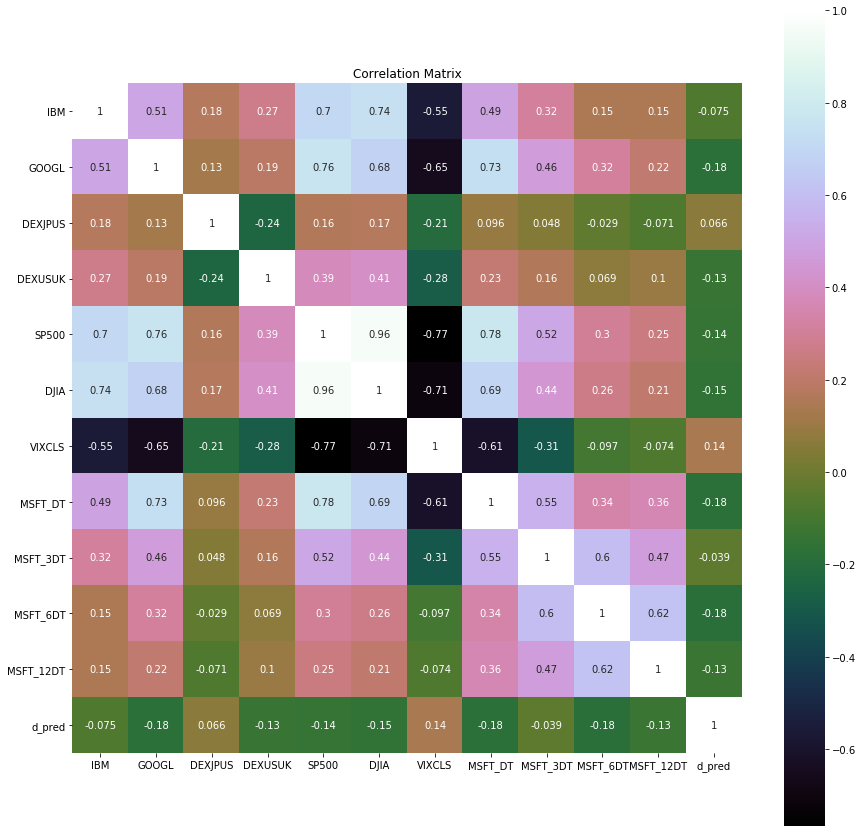

In [20]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

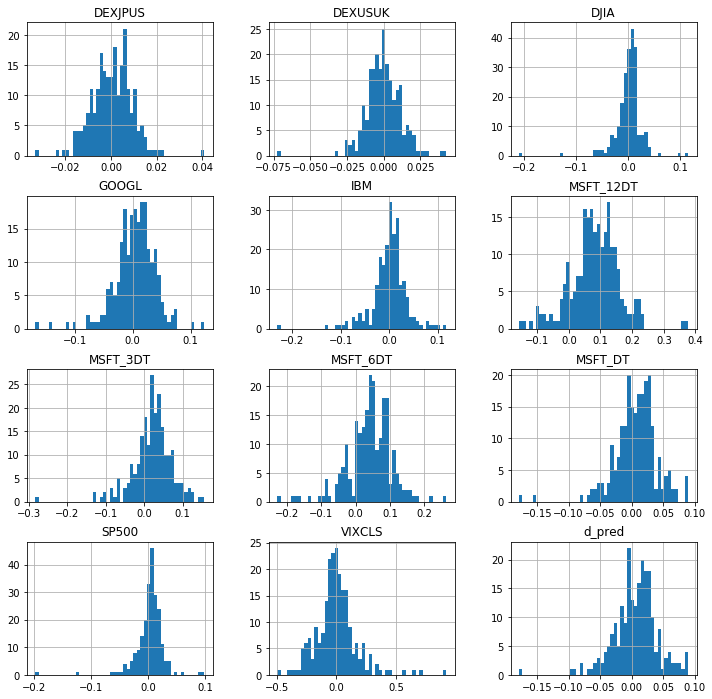

In [21]:
dataset.hist(bins=50,figsize=(12,12));

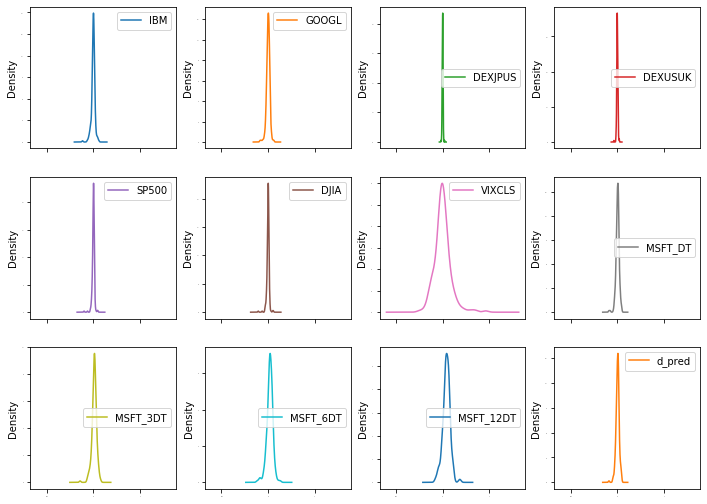

In [22]:
dataset.plot(kind="density",figsize=(12,12),subplots=True,fontsize=1,sharex=True, layout =(4,4));

<Figure size 864x864 with 0 Axes>

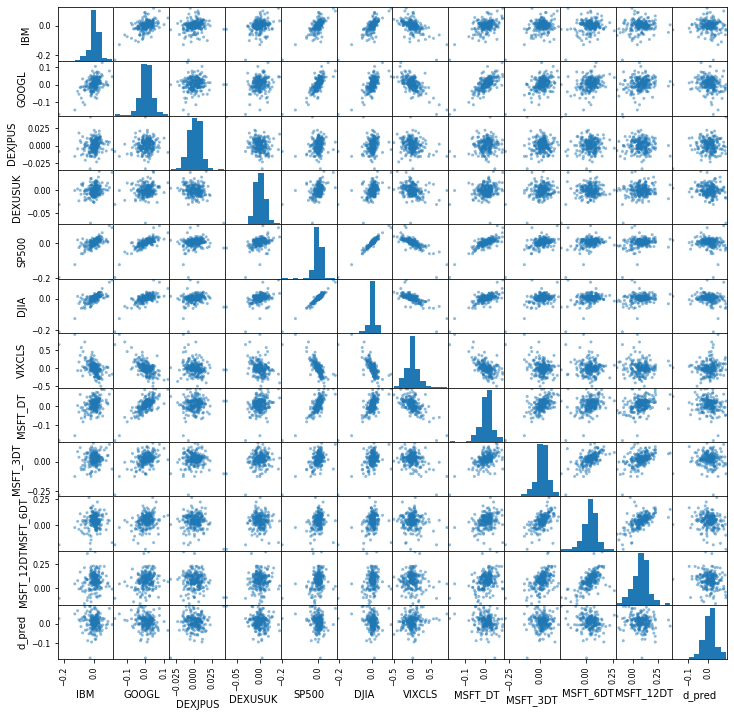

In [23]:
pyplot.figure(figsize=(12,12))
scatter_matrix(dataset,figsize=(12,12));

### 3.3 Time Series Analysis


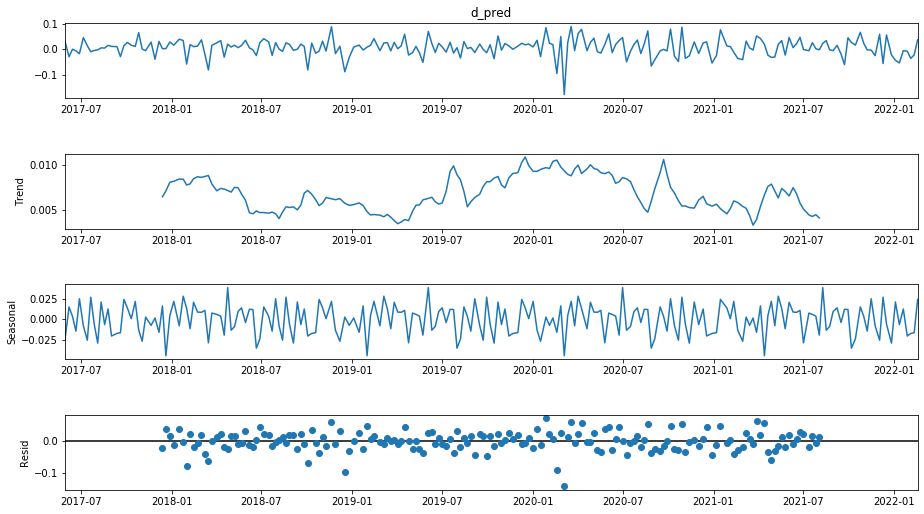

In [27]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

### 4.2. Feature Selection


In [32]:
bestfeature = SelectKBest(k=5,score_func=f_regression)
fit = bestfeature.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns =["Specs","Score"]
featureScores.nlargest(10,"Score")

,Specs,Score
9,MSFT_6DT,7.570
7,MSFT_DT,7.317
1,GOOGL,7.274
5,DJIA,5.296
4,SP500,4.729
6,VIXCLS,4.361
3,DEXUSUK,4.020
10,MSFT_12DT,3.628
0,IBM,1.275
2,DEXJPUS,0.981


5. Evaluate Algorithms and Models



In [33]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train,X_test = X[:train_size],X[train_size:]
Y_train,Y_test = Y[:train_size],Y[train_size:]

### 5.2. Test Options and Evaluation Metrics


In [34]:
num_folds = 10
seed = 7
scoring ="neg_mean_squared_error"

### 5.3. Compare Models and Algorithms

In [37]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RID',Ridge()))
              
models.append(('MLP', MLPRegressor()))

# Boosting methods
              
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
              
# Bagging methods
              
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [50]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    print("%s:%f (%f) %f %f" % (name,cv_results.mean(),cv_results.std(),train_result,test_result))
    
    
   

LR:0.001282 (0.000982) 0.001079 0.001137
LASSO:0.001252 (0.001038) 0.001248 0.001040
EN:0.001252 (0.001038) 0.001248 0.001040
KNN:0.001447 (0.001052) 0.000922 0.001154
CART:0.002446 (0.001741) 0.000000 0.002044
SVR:0.002384 (0.000771) 0.002337 0.001931
RID:0.001216 (0.000999) 0.001178 0.001022
MLP:0.002083 (0.002578) 0.001241 0.001350
ABR:0.001558 (0.001285) 0.000619 0.001113
GBR:0.001627 (0.001048) 0.000090 0.001164
RFR:0.001389 (0.001149) 0.000193 0.001015
ETR:0.001413 (0.000997) 0.000000 0.001033


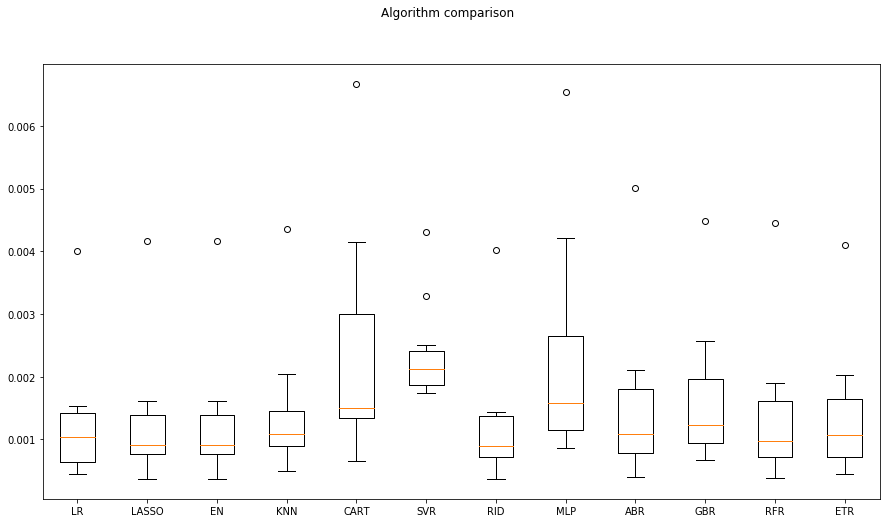

In [39]:
fig = pyplot.figure()
fig.suptitle("Algorithm comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(kfolds_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()


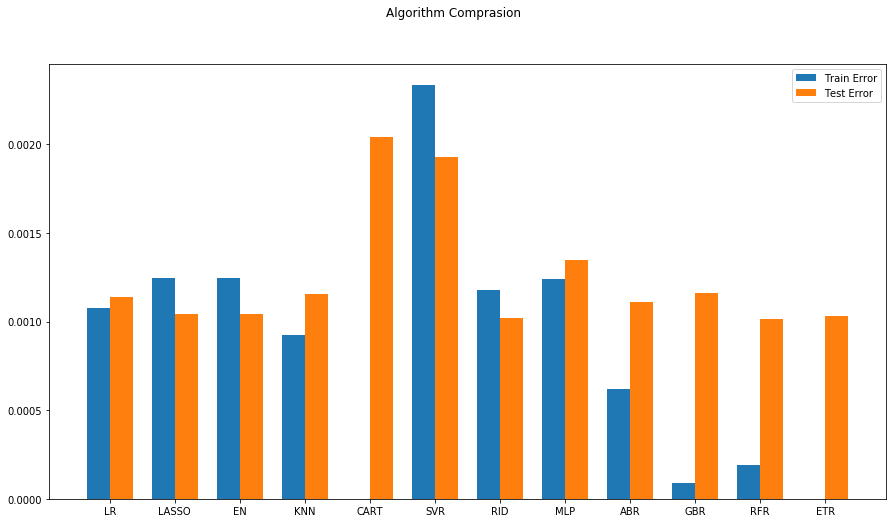

In [55]:
fig = pyplot.figure()
ind = np.arange(len(names))
width = 0.35

fig.suptitle("Algorithm Comprasion")
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,width=width,label="Train Error")
pyplot.bar(ind + width/2, test_results,width=width,label="Test Error")
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()


### Time series Model - ARIMA model

In [71]:
X_train_ARIMA=X_train.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
X_test_ARIMA=X_test.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)
                            

In [72]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [74]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0.0010989297941223287

### Time series Model - LTSMC model